In [42]:
from PIL import Image
from PIL import ImageFilter as imf
from PIL import ImageChops

import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
#import cv2
import matplotlib 
import matplotlib.pyplot as plt
import pylab

from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage import measure
from skimage.color import rgba2rgb
from skimage.color import rgb2grey
from skimage.color import grey2rgb
from skimage.filters import threshold_minimum
import pandas as pd

In [43]:
def marmoset2array(filename, sharp_par = 50):
    
    #opening image
    im = Image.open(filename)
    np_im = np.array(im)
    print('image open : ' + filename)
    
    # preparing mask
    mask_alpha = np.zeros([np_im.shape[0],np_im.shape[1]])
    mask_alpha[np_im[:,:,3] == 255] = 255
    im_mask_alpha = Image.fromarray(mask_alpha)

    # blurring - before zero option
    blurred_im = im_mask_alpha.filter(imf.MinFilter(size=3))
    noise_im = Image.fromarray(np.array(im_mask_alpha) - np.array(blurred_im))
    print('preparing for loop')
    
    for iter in range(7):
        noise_im = (noise_im.filter(imf.MaxFilter(3))).filter(imf.MinFilter(3))
        
    # thresholding - possible when we lose something
    gray_im = rgb2grey(rgba2rgb(im))

    # possible sharpening - against losing dots
    blur_im = ndi.gaussian_filter(gray_im, 3)
    filt_blur_im = ndi.gaussian_filter(blur_im, 1)
    print('sharpening done')

    sharp_im = blur_im + sharp_par * (blur_im - filt_blur_im)
    # end sharpening

    #threshold - possibly where we lose something
    # thresh_min_im = threshold_minimum(gray_im)
    thresh_min_im = np.zeros(gray_im.shape)
    dots_outline_im = sharp_im > thresh_min_im  # with sharpening
    # dots_outline_im = gray_im > thresh_min_im  # without sharpening
    real_dots_im = ((np.array(dots_outline_im) + np.array(noise_im)) != 0) * 255  # or operator
    print ('image acquired')
    
    return real_dots_im

In [44]:
df_orig = pd.read_csv('marmoset_brain_architecture_all_injections.txt')
df_orig = df_orig.drop_duplicates(subset=['case_id', 'tracer_id'])

In [45]:
df_orig["filename"] = df_orig["case_id"] + "." + df_orig["tracer_id"] +".png"
df_orig.head()

,Unnamed: 0,case_id,tracer_id,target,source,cell_count,flne,gmeannz,mean,std,filename
0,0,CJ108,FE,A8aV,A24a,0,0.000000,0.000166,0.000090,0.000162,CJ108.FE.png
115,115,CJ108,FR,A8aD,A24a,2,0.001472,0.001472,0.000491,0.000850,CJ108.FR.png
230,230,CJ74,FR,A8aV,A24a,0,0.000000,0.000166,0.000090,0.000162,CJ74.FR.png
345,345,CJ74,FB,A8b,A24a,23,0.032670,0.015535,0.019825,0.013110,CJ74.FB.png
460,460,CJ74,DY,A8b,A24a,35,0.008555,0.015535,0.019825,0.013110,CJ74.DY.png


In [46]:
df_orig['array'] = map(lambda x: marmoset2array ('/Users/amirakorkor/Desktop/marmoset/data/' + x), df_orig['filename'])

image open : /Users/amirakorkor/Desktop/marmoset/data/CJ108.FE.png
preparing for loop
sharpening done
image acquired
image open : /Users/amirakorkor/Desktop/marmoset/data/CJ108.FR.png
preparing for loop
sharpening done
image acquired
image open : /Users/amirakorkor/Desktop/marmoset/data/CJ74.FR.png
preparing for loop
sharpening done
image acquired
image open : /Users/amirakorkor/Desktop/marmoset/data/CJ74.FB.png
preparing for loop
sharpening done
image acquired
image open : /Users/amirakorkor/Desktop/marmoset/data/CJ74.DY.png
preparing for loop
sharpening done
image acquired
image open : /Users/amirakorkor/Desktop/marmoset/data/CJ83.DY.png
preparing for loop
sharpening done
image acquired
image open : /Users/amirakorkor/Desktop/marmoset/data/CJ78.FE.png
preparing for loop
sharpening done
image acquired
image open : /Users/amirakorkor/Desktop/marmoset/data/CJ78.FB.png
preparing for loop
sharpening done
image acquired
image open : /Users/amirakorkor/Desktop/marmoset/data/CJ78.DY.png
prep

sharpening done
image acquired
image open : /Users/amirakorkor/Desktop/marmoset/data/CJ75X.DY.png
preparing for loop
sharpening done
image acquired
image open : /Users/amirakorkor/Desktop/marmoset/data/CJ75X.FR.png
preparing for loop
sharpening done
image acquired
image open : /Users/amirakorkor/Desktop/marmoset/data/CJ19.FE.png
preparing for loop
sharpening done
image acquired
image open : /Users/amirakorkor/Desktop/marmoset/data/CJ19.FR.png
preparing for loop
sharpening done
image acquired
image open : /Users/amirakorkor/Desktop/marmoset/data/CJ21.FB.png
preparing for loop
sharpening done
image acquired
image open : /Users/amirakorkor/Desktop/marmoset/data/CJ21.DY.png
preparing for loop
sharpening done
image acquired
image open : /Users/amirakorkor/Desktop/marmoset/data/CJ76.FE.png
preparing for loop
sharpening done
image acquired
image open : /Users/amirakorkor/Desktop/marmoset/data/CJ76.DY.png
preparing for loop
sharpening done
image acquired
image open : /Users/amirakorkor/Desktop

sharpening done
image acquired
image open : /Users/amirakorkor/Desktop/marmoset/data/CJ182.CTBgr.png
preparing for loop
sharpening done
image acquired
image open : /Users/amirakorkor/Desktop/marmoset/data/CJ182.DY.png
preparing for loop
sharpening done
image acquired


In [47]:
df_orig.head(30)

,Unnamed: 0,case_id,tracer_id,target,source,cell_count,flne,gmeannz,mean,std,filename,array
0,0,CJ108,FE,A8aV,A24a,0,0.000000,0.000166,0.000090,0.000162,CJ108.FE.png,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
115,115,CJ108,FR,A8aD,A24a,2,0.001472,0.001472,0.000491,0.000850,CJ108.FR.png,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
230,230,CJ74,FR,A8aV,A24a,0,0.000000,0.000166,0.000090,0.000162,CJ74.FR.png,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
345,345,CJ74,FB,A8b,A24a,23,0.032670,0.015535,0.019825,0.013110,CJ74.FB.png,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
460,460,CJ74,DY,A8b,A24a,35,0.008555,0.015535,0.019825,0.013110,CJ74.DY.png,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
575,575,CJ83,DY,A8b,A24a,197,0.022976,0.015535,0.019825,0.013110,CJ83.DY.png,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
690,690,CJ78,FE,A4ab,A24a,0,0.000000,0.000155,0.000031,0.000069,CJ78.FE.png,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
805,805,CJ78,FB,A4ab,A24a,0,0.000000,0.000155,0.000031,0.000069,CJ78.FB.png,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
920,920,CJ78,DY,A3a,A24a,0,0.000000,NaN,0.000000,0.000000,CJ78.DY.png,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
1035,1035,CJ801,DY,A46D,A24a,6,0.000250,0.000250,0.000125,0.000177,CJ801.DY.png,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."


In [59]:
image = df_orig['array'].loc[115]

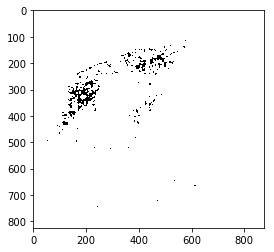

In [65]:
plt.imshow(image, cmap='gray')
#F = pylab.gcf()
#F.set_figsize_inches((DefaultSize[0]*2, DefaultSize[1]*2))

In [56]:
image = np.zeros((825, 875))
for item in df_orig[df_orig['target'] == 'A10']:
    image += (np.array(item['array'])/255)

TypeError: string indices must be integers, not str